In [8]:
# Import libraries (copy from Syllabus)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

np.random.seed(42)

In [9]:
# Import data types file
types = pd.read_csv('./data/dtypes_survey_music_clean.csv', 
                    index_col=0).to_dict()['0']

In [10]:
# Import dataset
survey_df = pd.read_csv('./data/survey_music_clean.csv')

for col, dtype in types.items():
    survey_df[col] = survey_df[col].astype(dtype)

In [11]:
# Validation of data types
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Timestamp                     724 non-null    datetime64[ns]
 1   Age                           724 non-null    float64       
 2   Primary streaming service     724 non-null    category      
 3   Hours per day                 724 non-null    float64       
 4   While working                 724 non-null    category      
 5   Instrumentalist               724 non-null    category      
 6   Composer                      724 non-null    category      
 7   Fav genre                     724 non-null    category      
 8   Exploratory                   724 non-null    category      
 9   Foreign languages             724 non-null    category      
 10  BPM                           724 non-null    float64       
 11  Frequency [Classical]         72

In [12]:
# Let's see some random records
survey_df.sample(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
326,2022-08-29 03:13:27,20.0,apple music,3.0,yes,yes,no,metal,yes,no,...,0.0,1.0,3.0,2.0,7.0,4.0,7.0,0.0,improve,i understand.
518,2022-08-29 03:44:33,21.0,spotify,3.0,yes,no,no,hip hop,yes,yes,...,3.0,3.0,3.0,0.0,8.0,8.0,3.0,3.0,improve,i understand.
554,2022-08-28 18:33:32,32.0,spotify,3.0,yes,yes,yes,rock,yes,yes,...,3.0,1.0,3.0,1.0,6.0,6.0,7.0,5.0,improve,i understand.
33,2022-08-28 18:35:17,21.0,i do not use a streaming service.,3.0,yes,no,no,rock,no,no,...,1.0,2.0,3.0,3.0,9.0,10.0,3.0,0.0,no effect,i understand.
375,2022-09-04 15:41:59,16.0,spotify,7.0,yes,no,no,video game music,yes,no,...,0.0,3.0,1.0,2.0,4.0,8.0,8.0,4.0,no effect,i understand.


# EDA (Exploratory Data Analysis)

Exploratory Data Analysis (EDA) is a process of analyzing datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods. EDA is a critical step in the data science process as it allows one to understand the underlying patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations. This approach is often open-ended, where the analyst probes the data in various ways to uncover underlying structures and insights.


## How is 'Age' and 'Hours per day' distributed?

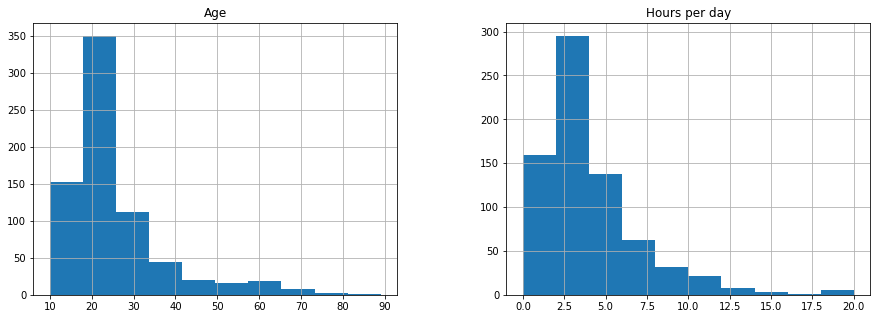

In [13]:
survey_df[['Age','Hours per day']].hist(figsize=(15,5))
plt.show()

- The majority of respondents appear to be young, although there are some older individuals in the dataset.
- The music listening habits are concentrated between 2.5 and 4 hours per day for almost everyone. While it would be intriguing if the distribution exhibited a bimodal pattern, suggesting potential segmentation based on age or daily listening hours, such a trend does not seem to be present in the data.

## Streaming Service Usage

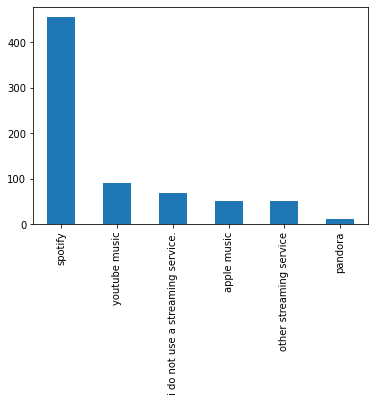

In [14]:
survey_df['Primary streaming service'].value_counts().plot(kind='bar');

Spotify has the largest amount of music. It is interesting to see that in third place we get no streaming service. From this plot we can continue and see the distribution of hours per day listened by those without a streaming service

<AxesSubplot:>

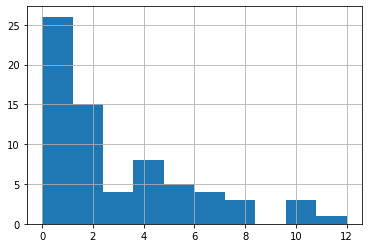

In [15]:
df_wo_stream=survey_df[survey_df["Primary streaming service"]==
                       "i do not use a streaming service."]
df_wo_stream['Hours per day'].hist()

More 0's here compared to entries with streaming services. Highlights the significance for Music Therapy—having a streaming service appears linked to increased listening time. Suggests potential adjustments if listening time needs curbing when streaming services are limited or absent.

## Music Genre Preferences

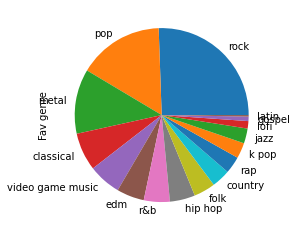

In [16]:
survey_df['Fav genre'].value_counts().plot(kind='pie');

Here we see how pop and rock dominate all other categories. Maybe because it is easier to describe music in more specific terms. Metal would be considered rock by a lot of people, for example

## Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. A correlation of -1 indicates a perfect negative correlation, while 1 indicates a perfect positive correlation, and 0 indicates no correlation. It's commonly used to understand the relationship between different variables and is a key tool in exploratory data analysis and statistics.

Depending on the dataset some correlations mean different things. In the following we see a brief description of how different values can mean different things

| Correlation Value | Interpretation               |
|-------------------|------------------------------|
| +1.0              | Perfect positive correlation |
| +0.7 to +0.9      | Strong positive correlation  |
| +0.4 to +0.6      | Moderate positive correlation|
| +0.1 to +0.3      | Weak positive correlation    |
| 0                 | No linear correlation        |
| -0.1 to -0.3      | Weak negative correlation    |
| -0.4 to -0.6      | Moderate negative correlation|
| -0.7 to -0.9      | Strong negative correlation  |
| -1.0              | Perfect negative correlation |


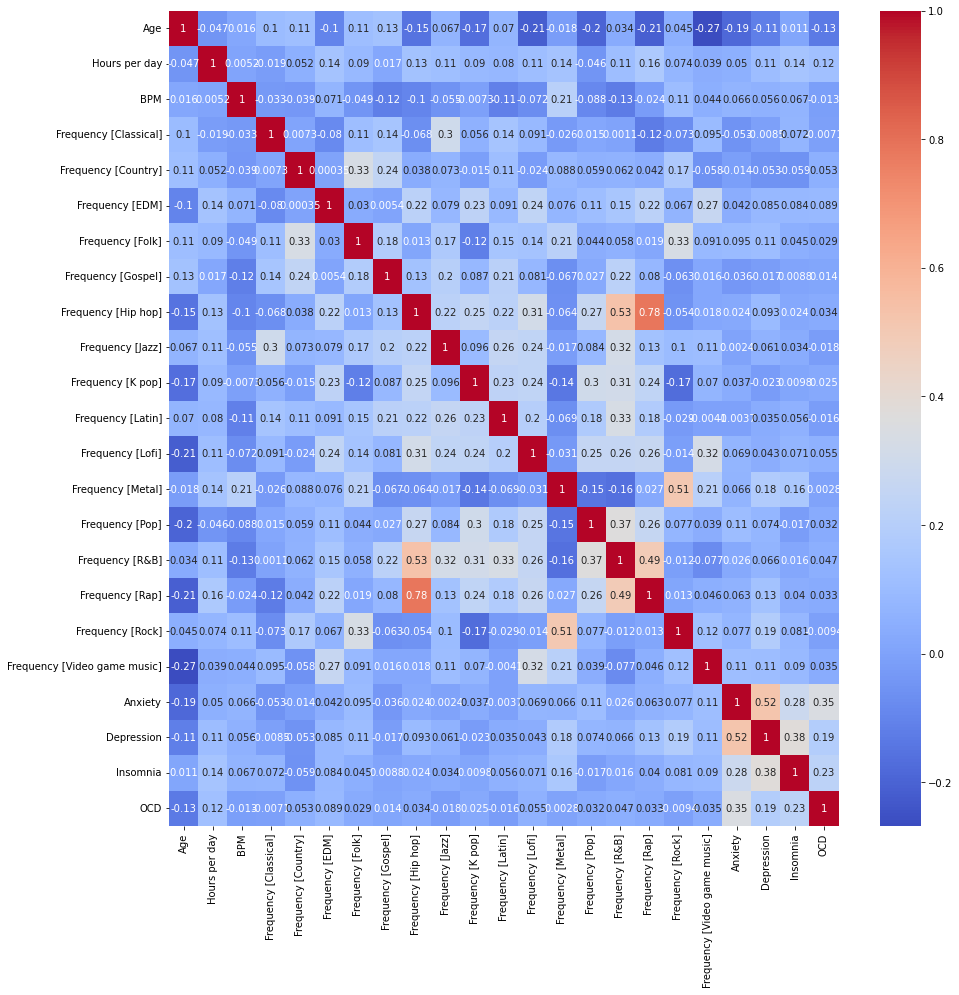

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(survey_df.select_dtypes(np.number).
            corr(), annot=True, cmap='coolwarm');

Since the dataframe is somewhat large we will show correlations in the levels described in the previous table

<AxesSubplot:>

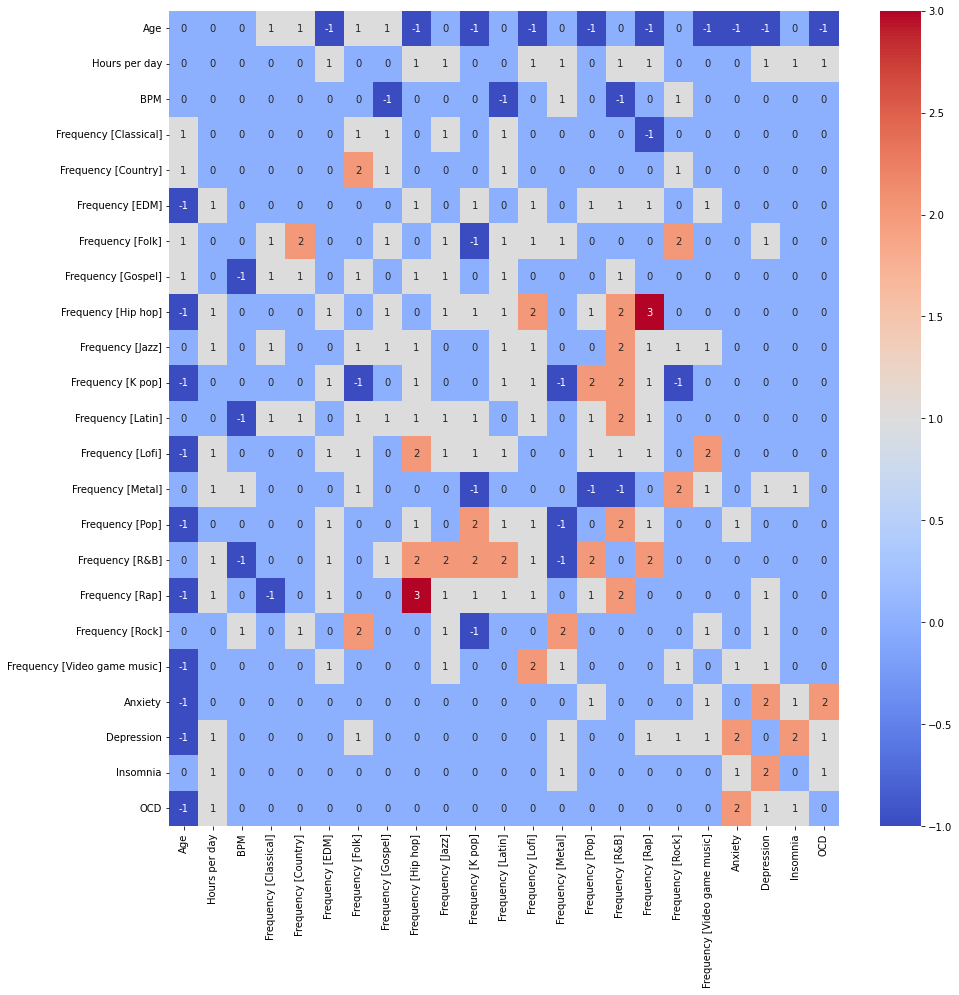

In [18]:
# Long code, copy it from syllabus
corr_survey=survey_df.select_dtypes(np.number).corr()
levels_corr=np.zeros(shape=corr_survey.shape)

levels=np.arange(-3,4)
ranges=[(-1,-0.7),(-0.7,-0.4),(-0.4,-0.1),(-0.1,0.1),(0.1,0.3),(0.3,0.7),(0.7,1)]

for i,r in enumerate(ranges):
    lower,upper=r
    levels_corr[(corr_survey>=lower) & (corr_survey<upper)] =levels[i]

levels_corr=pd.DataFrame(data=levels_corr,index=corr_survey.index,columns=corr_survey.columns)

plt.figure(figsize=(15,15))
sns.heatmap(levels_corr, annot=True, cmap='coolwarm')

Some interesting correlations:
- Hip hop and rap are heavily correlated. They could be joined in the same genre
- Jazz is correlated with R&B (Blues)
- Almost all of the mental health issues are moderatley positively correlated

All of the other correlations are weak in either direction

## Boxplots for Mental Health Metrics

<AxesSubplot:>

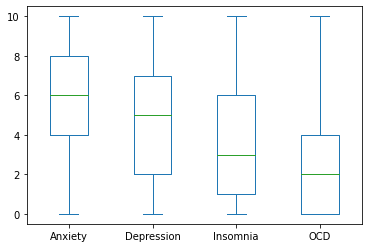

In [19]:
survey_df[['Anxiety', 'Depression', 
                 'Insomnia', 'OCD']].plot(kind='box')

As we previously discussed, anxiety has a higher score than the rest of them. 

## Relationship Between Age and Mental Health

A pairplot displays pairwise relationships in a dataset. By plotting every variable against every other, it provides a comprehensive view of correlations, trends, and clusters, useful for exploratory data analysis to quickly understand the structure and relationships within the data.

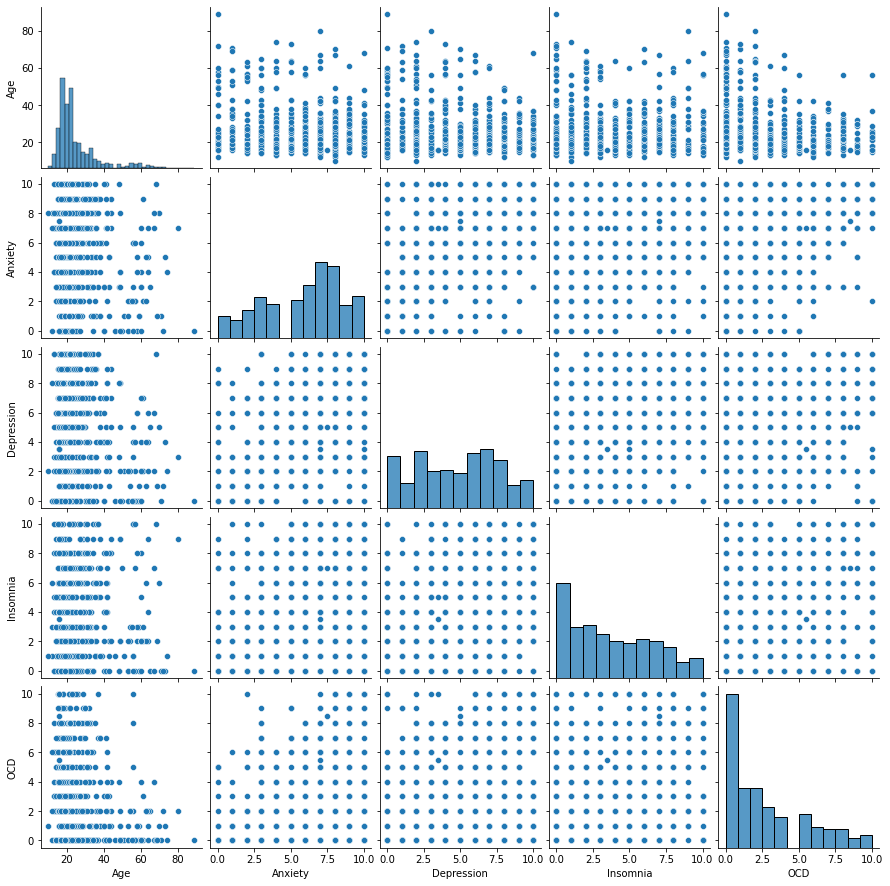

In [20]:
sns.pairplot(survey_df, vars=['Age', 'Anxiety', 
                'Depression', 'Insomnia', 'OCD']);

Since the values for the mental health scores are ordinal, they appear as a grid. We will need to refine this analysis to say more about the data.

# Pivoting
Pivoting is used to reshape data by turning unique values from one column into multiple columns, thereby reorganizing the data.


*Example*: Convert a long format of data where one column contains various attributes into a wide format where each attribute gets its own column.

We'll create a pivot table to see the average 'Hours per day' for each 'Fav genre'.

In [21]:
# Pivot table for average hours per day by favorite genre
pivot_table = survey_df.pivot_table(index=
            'Fav genre', values='Hours per day', 
            aggfunc='mean')
pivot_table

,Hours per day
Fav genre,
classical,2.906863
country,3.380000
edm,4.594595
folk,3.296552
gospel,2.375000
hip hop,3.955882
jazz,5.425000
k pop,3.476190
latin,8.500000


Average 'Hours per day' by 'Fav genre' shows interesting variations in listening habits across different genres. For example, fans of 'jazz' tend to listen for an average of about 5.43 hours per day.

Note: this is the same as grouping by Fav genre and then computing the mean of Hours per day

In [22]:
pd.DataFrame(survey_df.groupby('Fav genre')
             ['Hours per day'].mean())

,Hours per day
Fav genre,
classical,2.906863
country,3.380000
edm,4.594595
folk,3.296552
gospel,2.375000
hip hop,3.955882
jazz,5.425000
k pop,3.476190
latin,8.500000


The differences between these two methods is with pivot tables we can get a way more readable output when making more inquiries as you can see in the following example

In [23]:
# Pivot Table with dual aggregation: mean and count
pivot_table_dual_agg = pd.pivot_table(survey_df, 
            values='Hours per day', index='Fav genre', 
    columns='Music effects', aggfunc=['mean', 'count'])

pivot_table_dual_agg  

mean                        count                 
Music effects      improve  no effect    worsen improve no effect worsen
Fav genre                                                               
classical         3.128378   2.192308  4.000000      37        13      1
country           3.325000   3.600000       NaN      20         5      0
edm               4.774194   3.666667       NaN      31         6      0
folk              3.195652   3.683333       NaN      23         6      0
gospel            2.375000        NaN       NaN       6         0      0
hip hop           3.766667   5.375000       NaN      30         4      0
jazz              5.968750   3.250000       NaN      16         4      0
k pop             3.588235   3.000000       NaN      17         4      0
latin             5.000000  12.000000       NaN       1         1      0
lofi              4.200000        NaN       NaN      10         0      0
metal             3.583333   3.714286       NaN      66        21      0
pop               2.976744   2.840000  1.625000      86        25      4
r&b               3.634615   3.000000       NaN      26         9      0
rap               4.444444   6.250000  6.000000      18         4      1
rock              3.714173   3.529412  3.571429     127        51      7
video game music  2.981481   3.250000  1.375000      27        13      4

This is also the same as the following aggregation, but pivot tables have proved to be simpler to think about. When doing data analysis you want to spend as little time as possible thinking about details and most of the time thinking about the analysis itself

In [24]:
pd.DataFrame(survey_df.groupby(['Fav genre','Music effects'])
             ['Hours per day'].aggregate(['mean','count']))

mean  count
Fav genre        Music effects                  
classical        improve         3.128378     37
                 no effect       2.192308     13
                 worsen          4.000000      1
country          improve         3.325000     20
                 no effect       3.600000      5
                 worsen               NaN      0
edm              improve         4.774194     31
                 no effect       3.666667      6
                 worsen               NaN      0
folk             improve         3.195652     23
                 no effect       3.683333      6
                 worsen               NaN      0
gospel           improve         2.375000      6
                 no effect            NaN      0
                 worsen               NaN      0
hip hop          improve         3.766667     30
                 no effect       5.375000      4
                 worsen               NaN      0
jazz             improve         5.968750     16
                 no effect       3.250000      4
                 worsen               NaN      0
k pop            improve         3.588235     17
                 no effect       3.000000      4
                 worsen               NaN      0
latin            improve         5.000000      1
                 no effect      12.000000      1
                 worsen               NaN      0
lofi             improve         4.200000     10
                 no effect            NaN      0
                 worsen               NaN      0
metal            improve         3.583333     66
                 no effect       3.714286     21
                 worsen               NaN      0
pop              improve         2.976744     86
                 no effect       2.840000     25
                 worsen          1.625000      4
r&b              improve         3.634615     26
                 no effect       3.000000      9
                 worsen               NaN      0
rap              improve         4.444444     18
                 no effect       6.250000      4
                 worsen          6.000000      1
rock             improve         3.714173    127
                 no effect       3.529412     51
                 worsen          3.571429      7
video game music improve         2.981481     27
                 no effect       3.250000     13
                 worsen          1.375000      4

Here ara some **Key Points to Consider** when deciding to use a pivot table or an aggregation

1. **Flexibility in Data Presentation**: While the groupby with aggregate method achieves similar results in this case, pivot tables generally offer more flexibility in reorganizing and presenting data, especially when dealing with more complex or multi-dimensional datasets.

2. **Ease of Use and Interpretation**: Pivot tables can be more intuitive and easier to use, especially for users who are not as comfortable with coding. They allow for dynamic adjustments in how data is viewed and summarized, which can be particularly useful in exploratory data analysis.

3. **Adaptability**: Pivot tables excel in scenarios where the data needs to be sliced and diced in various ways for analysis. While groupby with aggregate can be powerful, it might require more coding effort to reshape the data for different types of analysis.

In summary, while the groupby with aggregate method can replicate some functionalities of pivot tables, pivot tables still hold an advantage in terms of their versatility, ease of use, and adaptability for various data analysis tasks.

## Melting
Melting is the reverse of pivoting, where you transform data from a wide format to a long format. It's useful when you have data with numerous columns, and you want to make it more manageable.

We'll melt the frequency columns for different music genres into a long format.

In [25]:
# Columns to melt 
frequency_cols = [col for col in survey_df.columns 
                  if col.startswith('Frequency')]

In [26]:
# Melting the data
melted_data = survey_df.melt(id_vars=['Timestamp', 'Age'], 
                    value_vars=frequency_cols, 
                var_name='Genre', value_name='Frequency')
melted_data


,Timestamp,Age,Genre,Frequency
0,2022-09-28 17:25:48,89.0,Frequency [Classical],0.0
1,2022-09-13 16:16:16,28.0,Frequency [Classical],1.0
2,2022-08-29 02:46:38,18.0,Frequency [Classical],1.0
3,2022-08-28 14:12:55,19.0,Frequency [Classical],1.0
4,2022-09-03 17:14:57,34.0,Frequency [Classical],3.0
...,...,...,...,...
11579,2022-08-30 13:07:20,14.0,Frequency [Video game music],3.0
11580,2022-08-28 20:15:28,26.0,Frequency [Video game music],3.0
11581,2022-09-01 19:08:55,55.0,Frequency [Video game music],0.0
11582,2022-08-28 20:04:49,19.0,Frequency [Video game music],0.0


The melted data shows a long format of the frequency columns, useful for in-depth analysis. This format is more manageable when dealing with multiple genre columns.

### Melting - severity of mental health issues

In [27]:
df_music_melt=survey_df.melt(id_vars=['Timestamp'],
                    value_vars=['Anxiety','Depression'])
df_music_melt


,Timestamp,variable,value
0,2022-09-28 17:25:48,Anxiety,0.0
1,2022-09-13 16:16:16,Anxiety,2.0
2,2022-08-29 02:46:38,Anxiety,3.0
3,2022-08-28 14:12:55,Anxiety,10.0
4,2022-09-03 17:14:57,Anxiety,0.0
...,...,...,...
1443,2022-08-30 13:07:20,Depression,0.0
1444,2022-08-28 20:15:28,Depression,5.0
1445,2022-09-01 19:08:55,Depression,0.0
1446,2022-08-28 20:04:49,Depression,5.0


We can count the unique values and then create a barplot using Seaborn's dataframe-oriented notation

In [28]:
count_values=df_music_melt[['value','variable']].value_counts()
count_values= pd.DataFrame(count_values).reset_index()
count_values

,value,variable,0
0,7.0,Anxiety,120
1,8.0,Anxiety,113
2,7.0,Depression,94
3,2.0,Depression,90
4,6.0,Depression,87
5,6.0,Anxiety,84
6,0.0,Depression,82
7,8.0,Depression,76
8,10.0,Anxiety,66
9,3.0,Anxiety,65


This dataframe comprises the sizes of all individuals reporting having anxiety or depression, along with their respective values. To achieve a more comprehensive representation, we'll utilize the `hue` parameter. This parameter allows us to segment our analysis as if we were plotting two distinct datasets simultaneously, with each dataset characterized by a unique value in the 'hue' column which is the column `variable` of our `count_values` df.


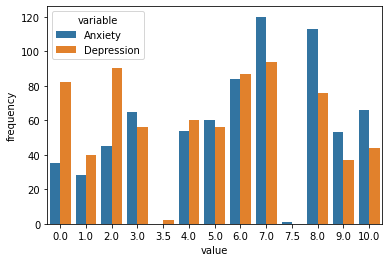

In [29]:
#sns.barplot(data=count_values,x='value',y=0,hue='variable')
#plt.ylabel('frequency');

At this juncture, we've encountered an issue. The dataset includes values of 7.5 and 3.5 in the mental health columns (Anxiety and Depression respectively), which seem out of place as all other numbers are integers.

Although this error wasn't identified during the preprocessing stage, we can't revert to that phase now, and it's still essential to rectify this inconsistency. To resolve this, we will transform each value in the mental health column into an integer. We'll achieve this by using Python's built-in `round` function, ensuring all data points are consistent and ordinal.

In [30]:
# Example of round function
round(2.4), round(2.1), round(2.7)

(2, 2, 3)

In [31]:
# Converting data into the correct values
survey_df.loc[:,['Anxiety', 'Depression', 'Insomnia', 
    'OCD']]=survey_df.loc[:,['Anxiety','Depression',
    'Insomnia', 'OCD']].apply(lambda x: round(x))

Next we'll see that all values are in the correct set with the following instructions

In [32]:
np.unique(survey_df.loc[:,['Anxiety', 'Depression', 
        'Insomnia', 'OCD']].values.reshape(-1))


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Now we can define the melted dataframe again

In [33]:
df_music_melt=survey_df.melt(id_vars=['Timestamp'],
                value_vars=['Anxiety','Depression'])
df_music_melt

,Timestamp,variable,value
0,2022-09-28 17:25:48,Anxiety,0.0
1,2022-09-13 16:16:16,Anxiety,2.0
2,2022-08-29 02:46:38,Anxiety,3.0
3,2022-08-28 14:12:55,Anxiety,10.0
4,2022-09-03 17:14:57,Anxiety,0.0
...,...,...,...
1443,2022-08-30 13:07:20,Depression,0.0
1444,2022-08-28 20:15:28,Depression,5.0
1445,2022-09-01 19:08:55,Depression,0.0
1446,2022-08-28 20:04:49,Depression,5.0


Now we are ready to count all the unique values in a tidy format. Instead of doing a two indexed value_count, let's practice what we learnt about pivot tables:

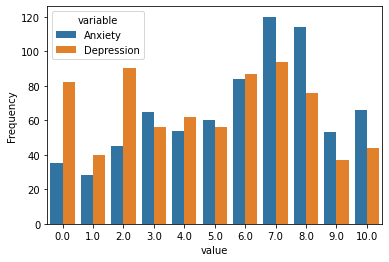

In [34]:
pivot_count=pd.pivot_table(data=df_music_melt,
        index=['variable','value'],aggfunc='count').reset_index()

sns.barplot(data=pivot_count,x='value',y='Timestamp',
            hue='variable')
plt.ylabel('Frequency')
plt.show()

We observe a significant peak in the severity of `Anxiety`, indicating its prevalence and persistence across the population. This pattern highlights `Anxiety` as one of the most pressing issues that need addressing.

It's crucial to note that an intensity of 5 does not imply the absence of symptoms; rather, it indicates a certain level of discomfort.

This plot underscores the urgency for interventions in mental health, particularly in the realm of music therapy. It clearly shows that a substantial portion of the population suffers from these conditions with considerable intensity, emphasizing the necessity for effective solutions.


# Prevalence of acute MH issues

In this section, we'll focus on gauging the severity of mental health issues among our respondents. Specifically, we aim to identify those who are significantly impacted by these conditions.

To quantify this, we'll establish a threshold: we consider a high level of mental health problems to be present when an individual's score for any single mental health issue exceeds 8. This criterion will help us pinpoint respondents experiencing acute mental health challenges.

Following this definition, we will create a histogram. This histogram will reveal the distribution of individuals who meet or surpass our defined severity threshold for at least one mental health problem. Such visual representation will provide us with a clear picture of the extent of severe mental health issues within our dataset.

In [35]:
mh_cols=['Anxiety','Depression','Insomnia','OCD']
perc_value_counts=(survey_df[mh_cols]>8).sum(axis=1).value_counts(normalize=True)*100 #normalize to get a percentage


In [36]:
perc_value_counts

0    70.580110
1    20.580110
2     7.044199
3     1.657459
4     0.138122
dtype: float64

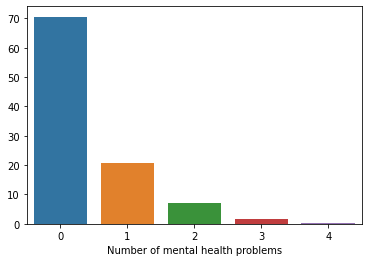

In [37]:
sns.barplot(x=perc_value_counts.index,
            y=perc_value_counts.values)
plt.xlabel('Number of mental health problems')
plt.show()

Fortunately, it appears that the majority of individuals in our dataset do not suffer from severe mental health (MH) issues. This is a positive indication.

Now, let's shift our focus to those with intense MH problems. We will examine how this particular group responds to music, as indicated in the `Music effects` column of our dataset. This analysis will help us understand the potential impact of music on individuals with significant mental health challenges

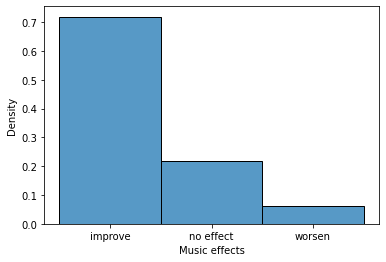

In [38]:
mh_intense=survey_df[(survey_df[mh_cols]>8).sum(axis=1)>1] # Participants who have at least one intense mh problem

sns.histplot(data=mh_intense,x='Music effects',
             stat='density') # density to be in percentage
plt.show()

This is very good news. The data reveals that individuals frequently self-report experiencing improvements in their mental health due to music. This insight underscores a market demand for a service that harnesses music as a tool for enhancing mental health. 

# Favorite Genre and Mental Health

We will now delve into an analysis to determine if there's a correlation between an individual's Favorite Genre and their level of mental health distress. This exploration is crucial for our hypothesis, as it can reveal valuable insights into consumer preferences and guide us in tailoring our music-based mental health solutions more effectively

In [39]:
# First, we need to reshape the data to have a column for genres, a column for condition (Anxiety/Depression), and a column for severity
tidy_format = pd.melt(survey_df, id_vars='Fav genre', 
            value_vars=['Anxiety', 'Depression'], 
            var_name='Condition', value_name='Severity')


In [40]:
# Calculating the median severity for each genre and condition for sorting
genre_median_severity = tidy_format.groupby
            (['Fav genre', 'Condition']).median().reset_index()

In [41]:
# Sorting genres based on the highest median severity of anxiety and depression
sorted_genres = genre_median_severity.sort_values(by='Severity', ascending=False)['Fav genre'].unique()

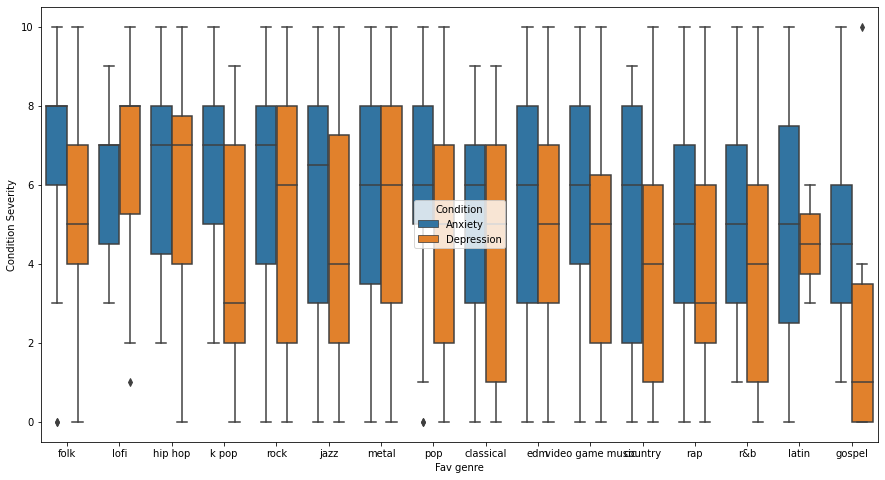

In [42]:
# Creating box plots
plt.figure(figsize=(15, 8))
sns.boxplot(x='Fav genre', y='Severity', 
    hue='Condition', data=tidy_format, order=sorted_genres)
plt.ylabel('Condition Severity')
plt.show()

Our comprehensive analysis has revealed insightful trends regarding the interplay between musical preferences and mental health conditions. The boxplot distinctly showcases that listeners of various music genres experience different levels of anxiety and depression severity. Notably, genres such as 'lofi' and 'classical' show a distribution towards lower severity levels of mental health conditions, which may suggest these genres' potential calming effects or associations with therapeutic listening habits.

From a business standpoint, these findings are invaluable. **They suggest that there is a significant opportunity to curate and offer genre-specific music therapies tailored to individual mental health needs**. By integrating these insights into our service offerings, we can potentially enhance the efficacy of our music-based mental health interventions. This, in turn, could lead to higher customer satisfaction and loyalty, positioning us as a leader in the intersection of music and wellness.

As we continue to refine our services and explore the nuances of music's impact on mental well-being, we remain committed to utilizing data-driven strategies to support our mission. This data not only affirms the presence of a market need but also reinforces our commitment to creating personalized, effective solutions for those seeking solace and healing through music.

## Correlations between MH problems
In the landscape of mental health solutions, understanding the dynamics between music preferences, listening habits, and mental health conditions is crucial. This heatmap offers a visual exploration of the correlations between favorite genres, listening hours, and the prevalence of various mental health issues. Through this analysis, we aim to identify patterns that could inform the development of more targeted and effective interventions.

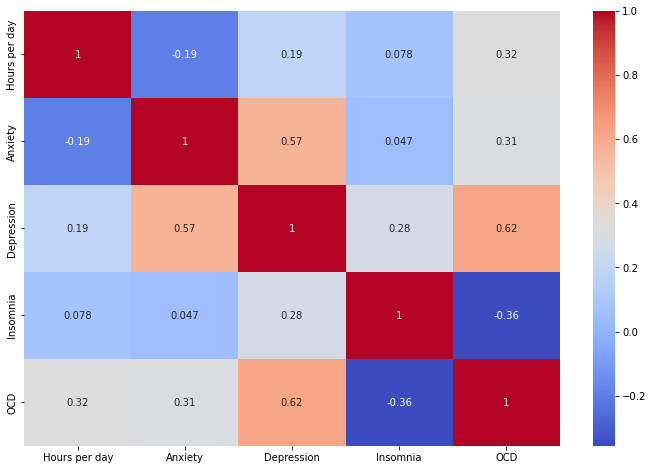

In [43]:
# We need to create a new dataframe that aggregates the necessary data
genre_mh_corr = survey_df.groupby('Fav genre')[['Hours per day', 
                'Anxiety', 'Depression','Insomnia','OCD']].mean()

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_mh_corr.corr(), annot=True, cmap='coolwarm')
plt.show()

The heatmap presents a clear correlation matrix that underscores significant relationships, particularly between OCD and Depression, and listening hours. With OCD and Depression exhibiting a strong positive correlation, there's an opportunity to intervene with curated musical experiences designed to alleviate these conditions. The positive correlation between listening hours and OCD suggests a potential niche market for extended listening sessions tailored to OCD management.

These insights direct us towards creating a differentiated product strategy that can cater to specific mental health conditions with precision. The data supports the development of personalized music therapy programs, potentially leading to a new service line that could offer substantial relief to individuals with mental health concerns. This targeted approach not only has the potential to enhance user outcomes but also positions as a data-driven pioneer in the intersection of music and mental wellness, thereby strengthening our value proposition to investors and customers alike.

## Time and intensity of MH issues
In the quest to tailor our music-based mental health interventions, we turn to temporal patterns that may reveal underlying trends in our users' experiences. The following analysis probes into weekly fluctuations in mental health issue severity and listening habits, offering potential insights into when individuals are most in need of support.

In [44]:
# Resample data to weekly frequency, calculating the mean for each week. 
weekly_agg = survey_df.resample('W', on='Timestamp')[['Hours per day',
                'Anxiety', 'Depression','Insomnia','OCD']].mean()
weekly_agg

,Hours per day,Anxiety,Depression,Insomnia,OCD
Timestamp,,,,,
2022-08-28,3.432186,6.008097,4.995951,3.582996,2.497976
2022-09-04,3.510987,5.754777,4.646497,3.869427,2.464968
2022-09-11,4.555263,4.500000,3.947368,3.236842,3.052632
2022-09-18,3.471774,5.806452,5.354839,4.096774,3.000000
2022-09-25,3.029412,5.705882,3.764706,1.823529,2.470588
2022-10-02,5.375000,5.375000,3.500000,2.375000,3.250000
2022-10-09,3.195652,7.434783,6.043478,4.869565,4.000000
2022-10-16,5.250000,8.500000,6.750000,4.250000,2.500000
2022-10-23,9.500000,9.500000,9.000000,6.500000,7.000000


<Figure size 1080x432 with 0 Axes>

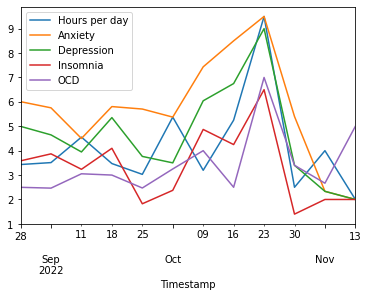

In [45]:
# Plotting time series data for weekly trends
plt.figure(figsize=(15, 6))
weekly_agg.plot(kind='line')
plt.show()

The plot indicates a significant uptick in both the reported severity of mental health issues and music listening hours during the week of October 23. This surge may reflect the increasing reach and influence of our study, attracting individuals actively seeking aid.

What stands out is the suggestion of a temporal pattern – a recurring period where individuals report exacerbated symptoms. Recognizing and anticipating these periods allows us to proactively adjust our offerings, ensuring that our services are most impactful when users need them the most. Validating this behavior is essential, as it could inform not only our marketing campaigns but also the development of timely and relevant content, ultimately solidifying our role as a responsive and attuned provider in the mental health and wellness landscape.

## Relationship between Streaming Service and mental Health
In the dynamic world of music streaming, the role of algorithms in influencing user experience is pivotal. The right algorithm can not only enhance music recommendations to uplift the listener's mood but can also broaden the reach to audiences who could benefit most from our mental health-focused services. Each streaming service has it's own algorithm and interface so it is expected to have differences in this behaviour.

In the next visualization we'll make this point for apple music and anxiety.

In [46]:
# Grouping data by streaming service and calculating the average severity of mental health issues
service_mh_grouped = survey_df.groupby('Primary streaming service')[['Anxiety', 'Depression','Insomnia','OCD']].mean()
service_mh_grouped

,Anxiety,Depression,Insomnia,OCD
Primary streaming service,,,,
apple music,6.700000,5.140000,3.420000,2.720000
i do not use a streaming service.,5.405797,4.159420,3.753623,2.347826
other streaming service,5.280000,4.340000,4.020000,2.400000
pandora,5.100000,3.700000,2.300000,1.500000
spotify,5.969231,5.092308,3.749451,2.797802
youtube music,5.366667,4.022222,3.600000,2.233333


<Figure size 1800x576 with 0 Axes>

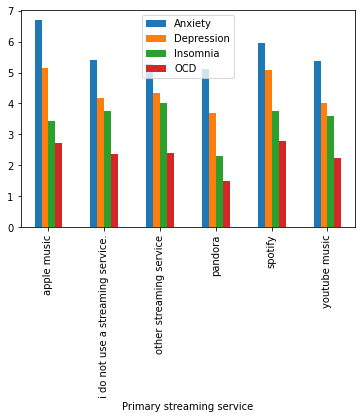

In [47]:
# Creating bar plots to visualize this relationship
plt.figure(figsize=(25, 8))
service_mh_grouped.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

The barplot above demonstrates that users of different streaming services report varying levels of mental health issue severity, with Apple Music users notably showing higher rates of Anxiety. **This observation feeds into our hypothesis that streaming services may play a role in users' mental health**.

### Validation: Hypothesis testing
In order to make this statement more formal we will employ statistical analysis to delve deeper, examining whether the incidence of Anxiety among Apple Music users is statistically significant compared to other services. If confirmed, this could influence our approach to partnering with streaming platforms and optimizing our marketing efforts to target audiences who might derive the most benefit from our therapeutic music interventions. This next step is not only crucial for validating our business strategy but also for refining our service delivery to where it can have the greatest impact.

We can make this comparison a more formal one if we perform a statistical test to see if apple music users really are more anxious. This is what the t-test does. In the following we perform this test and get it's t and p values.

In [48]:
# Filter the data for Apple Music users and users of other streaming services
apple_music_anxiety = survey_df[survey_df['Primary streaming service'] == 'apple music']['Anxiety']
other_services_anxiety = survey_df[survey_df['Primary streaming service'] != 'apple music']['Anxiety']

In [49]:
# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(apple_music_anxiety, other_services_anxiety, nan_policy='omit',alternative='greater')

In [50]:
# Output the t-statistic and p-value
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 2.287718661151316
P-Value: 0.011221107359385338


Remember the meaning of a statistical test and the p-values:

- The p-value is a statistical measure that helps us determine the significance of our results when conducting a hypothesis test.

A p-value of 0.011, in the context of a one-tailed test (as indicated by the `alternative='greater'` option), means that there is a $1.1\%$ probability that the observed difference or a more extreme result could occur under the null hypothesis. In other words, if there truly was no difference between the average Anxiety levels of Apple Music users and users of other streaming services, there would only be a $1.1\%$ chance of observing this result, or one more extreme, purely by random chance.

When the significance level ($\alpha$) is set at $0.05$, a p-value lower than $0.05$ generally leads us to reject the null hypothesis. Here, with a p-value of $0.011$, we would reject the null hypothesis and **conclude that Apple Music users have a statistically significant greater average level of reported Anxiety compared to users of other streaming services**.

It suggests that there is a particular subset of the population – Apple Music users – who may have a greater need for our mental health services. 
- This insight could steer our marketing strategies to specifically target Apple Music users, offering tailored music therapy solutions that are designed to address their higher incidence of Anxiety.
- Moreover, this data point could be a compelling piece of evidence in discussions with investors, highlighting the potential for targeted interventions and the value of our services in a market segment where there is a demonstrable need for support.

# Tidy vs. Wide Data
"Tidy" and "Wide" are two common formats for structuring datasets, each with its own advantages and ideal use cases. Understanding these formats is crucial for effective data manipulation and analysis.

## Tidy Data:
- In a tidy dataset, each variable forms a column, each observation forms a row, and each type of observational unit forms a table.
- This format is especially suited for statistical analysis and graphical representation.
- Tidy data is generally easier to manipulate, model, and visualize.
- It's particularly useful for time-series, longitudinal, or repeated measures data where you can have multiple observations for the same subject.
- Ideal for data analysis tools like R (especially with `tidyverse`) and Python's pandas library.

## Wide Data:
- In a wide dataset, each observation is spread across multiple rows and/or columns. It's often the format in which data is initially collected, particularly in survey data.
- Each row often contains multiple pieces of related information, which might represent different variables or the same variable measured at different times or under different conditions.
- It can be more intuitive and readable for human eyes, especially when dealing with a small number of variables.
- Wide format is often preferred for reporting purposes or when working with spreadsheet applications like Excel.

**Differences:**

1. **Data Organization**: Tidy data organizes data into one observation per row, making it uniform and consistent. Wide data spreads observations across multiple columns or rows.

2. **Ease of Use for Analysis**: Tidy data is generally easier to use in statistical analysis and visualization since many data analysis tools and methodologies are designed with tidy data in mind.

3. **Data Redundancy**: Wide data might lead to redundancy, especially if the same piece of information is repeated across multiple rows.

4. **Intuitiveness for Reporting**: Wide data can be more intuitive and readable for reporting purposes, as it presents all information related to a single observational unit together.

**Choosing Between Tidy and Wide Formats:**

- The choice between tidy and wide formats depends on the specific needs of your analysis or reporting. 
- For complex data analysis, especially when dealing with large datasets or when performing statistical tests and visualizations, tidy data is often more advantageous.
- For simpler, summary-level reporting or when working with smaller datasets, wide data might be more appropriate and easier to understand.

In summary, while tidy data is typically preferred for data analysis due to its consistency and compatibility with analysis tools, wide data may be more suitable for certain reporting contexts or when dealing with simpler datasets. The choice largely depends on the specific requirements of your data manipulation and analysis tasks.